# Employee Rentention Analysis
### Goal:
1. The aim is to model the probability of attrition of each employee from the HR Analytics Dataset. Studying the patterns will allow the higher management to identify the contributing factors that urge the employees to leave the company and which changes should be made to avoid their departure.
2. Also, to find which employees are likely to leave
---

> The Human Resources dataset contains: <br>

- <b>satisfaction_level:</b>Employee satisfaction level, from 0 to 1 [ numerical, decimal values between 0 and 1] <br>
- <b>last_evaluation:</b> Employee last evaluation score, from 0 to 1 [numerical, decimal values between 0 and 1]<br>
- <b>number_project:</b> Indicating the number of projects handled by the employee [numerical, integer values between 2 and 7]<br>
- <b>average_montly_hours:</b> The Average monthly hours worked by the employee [numerical, integer values between 96 and 310]<br>
- <b>time_spend_company:</b> Number of years spent in the company by the employee [numerical, integer values between 2 and 10]<br>
- <b>Work_acident:</b>Flag indicating if the employee had a work accident [categorical, boolean 0 or 1]<br>
- <b>promotion_last_5years:</b>Flag indicating if the employee has been promoting within the past 5 years [categorical, boolean]<br>
- <b>department: </b> Department of the employee: Sales, Accounting, HR, Technical, Support, Management, IT, Product Management, Marketing, R&D [categorical, 10 values]<br>
- <b>salary:</b> Salary level of the employee: Low, Medium, High [categorical, 3 values]<br>
- <b>left:</b> Flag indicating if the employee has left the company [categorical, boolean]  <br>
This is the target variable of the study, the one to be modelled.



Loading set of of libraries required of the project.

In [1]:
     
import pandas as pd #Data Manipulation
import numpy as np #Data Manipulation

import matplotlib.pyplot as plt #Plotting
import seaborn as sns #Plotting
sns.set(style='white')

from sklearn import preprocessing #Preprocessing

from scipy.stats import skew, boxcox_normmax #Preprocessing
from scipy.special import boxcox1p #Preprocessing

from sklearn.model_selection import train_test_split #Train/Test Split
from sklearn.linear_model import LogisticRegression #Model

from sklearn.metrics import classification_report #Metrics
from sklearn.metrics import confusion_matrix #Metrics
from sklearn.metrics import accuracy_score #Metrics
from sklearn.metrics import roc_auc_score, roc_curve #ROC
from sklearn import model_selection #Cross Validation
from sklearn.feature_selection import RFE, RFECV #Feature Selection

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"   # We can see the value of multiple statements at once.

In [2]:

hr_df = pd.read_csv('hr_data.csv') 

hr_df.head()
hr_df.tail()
hr_df.info()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [3]:
print('Rows:', hr_df.shape[0], '| Columns:', hr_df.shape[1])

Rows: 14999 | Columns: 9


The dataset consists in 14,999 rows and 9 columns. Each row represents an employee, and each column contains one employee attribute. <BR>

<BR>
    Let us display values in categorical columns:

In [8]:
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


## Joining the Employee Satisfaction and Evaluation Data

In [13]:
emp_satisfaction = pd.read_excel('employee_satisfaction_evaluation.xlsx')

emp_satisfaction.head()
emp_satisfaction.shape


,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


(14999, 3)

### Merging the employee table with the employee satisfaction table

In [15]:
main_df = hr_df.set_index('employee_id').join(emp_satisfaction.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()   #After merging tables, it is required to reset the index to flatten the array
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [16]:
#check for missing values
main_df[main_df.isnull().any(axis=1)]  

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


The columns - Satisfaction level and last Evaluation have the most number of missing values

In [17]:
main_df.describe()    


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
main_df.fillna(main_df.mean(), inplace=True)   #filling NA with mean in places of true
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [20]:
# Removing employee ID as it is not a metric that will influence the algorithm
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


<b>Exploratory Data Analysis:

 The objective of this study is to build a model to predict the value of the variable <b>left</b>, based on the other metrics available. <br>
  Need to predict based on the data here , as HR uses historical data to run it on the exisitng data to find employees who are likeyl to leave. <br>
Following up with  incentives to the indentified employees, if they want to retain these selected employees.

In [26]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [27]:
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [28]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

<b> 23.8% of the employees listed in the dataset have left the company.

In [29]:
main_df_final.groupby('left').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation
left,,,,,,,
0,3.786664,199.060203,3.380032,0.175009,0.026251,0.666762,0.715468
1,3.855503,207.419210,3.876505,0.047326,0.005321,0.440234,0.718228


Employees who left the company have:
<ol>
1. lower satisfaction level: 0.44 <br>
2. More monthly working hours: 207 <br>
3. lower work accident ratio: 0.05 <br>
4. lower promotion rate: 0.01 <br>
</ol>

### Displaying Correlation Matrix:

No handles with labels found to put in legend.


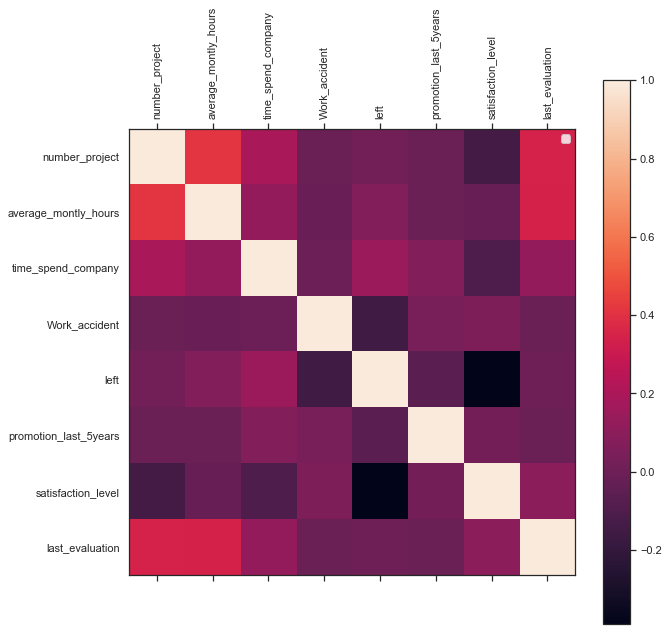

In [31]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.
'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df_final)

<b>Correlation Analysis</b> <br>
The correlation matrix will help, identify relationships between the different variables present in the dataset. It might also reveal some patterns.

- Most higly correlated to left is the time spent in the company. Longer they have worked, higher are their chances of leaving
- The number of projects and average_monthly_hours have a moderate positive correlation
- last_evaluation and average_monthly_hours have a moderate positive correlation 
- left and satisfaction_level have a moderate negative correlation  

<b> Retention by Salary Levels </b>

In [33]:
print('Salary Levels proportions')
print(main_df_final['salary'].value_counts()/len(main_df_final)*100)
print('\n')
print('Turnover Rate by Salary level')
print(main_df_final.groupby('salary')['left'].mean())

Salary Levels proportions
low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64


Turnover Rate by Salary level
salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64


 - Employees with higher salaries tend to stay in the company , whereas employees with low salaries tend to leave the company.

<b> Turnover by Departments </b>

In [37]:
main_df_final['department'].value_counts()/len(main_df_final)*100

sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: department, dtype: float64

- Employees in the HR department have the lowest Retention ( highest turnover )

<b> Lets view the numbers in terms of graphs: </b>

<b>Turnover by Satisfaction Level</b>

<Figure size 1080x360 with 0 Axes>

(0.09, 1.0)

<Figure size 1080x360 with 0 Axes>

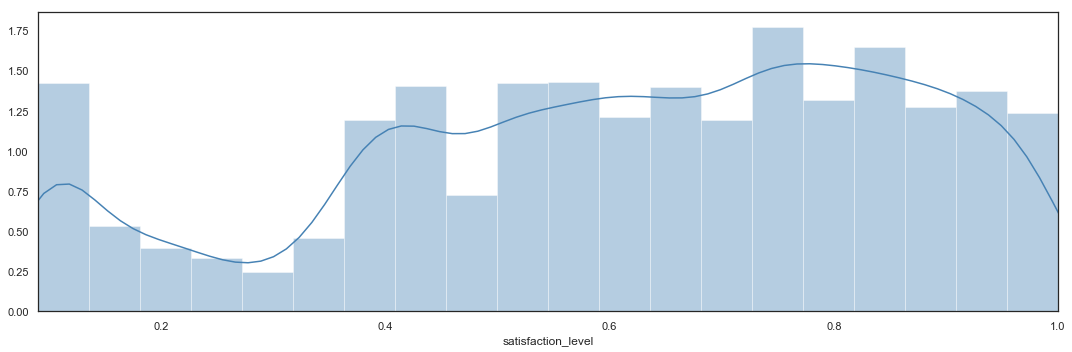

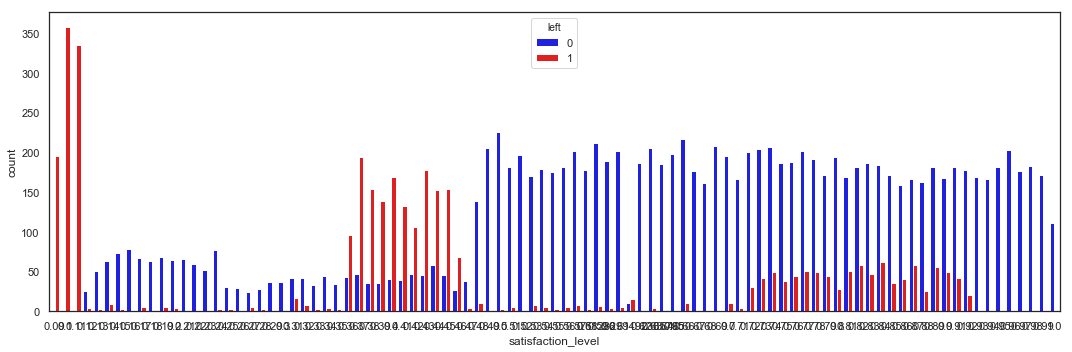

In [45]:
plt.figure(figsize=(15,5))
sns.distplot(main_df_final.satisfaction_level,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(main_df_final.satisfaction_level),max(main_df_final.satisfaction_level))
plt.tight_layout()


plt.figure(figsize=(15,5))
sns.countplot(main_df_final['satisfaction_level'],
              hue = main_df_final['left'],
              palette = ('blue', 'red'))
plt.tight_layout()

- Employees with very low satisfaction leave the company, with satisfaction level just being below 0.5. 
- Moderately satisfied employees also tend to leave the company

<b> Turnover by Number of Projects

<Figure size 1080x360 with 0 Axes>

(2, 7)

<Figure size 1080x360 with 0 Axes>

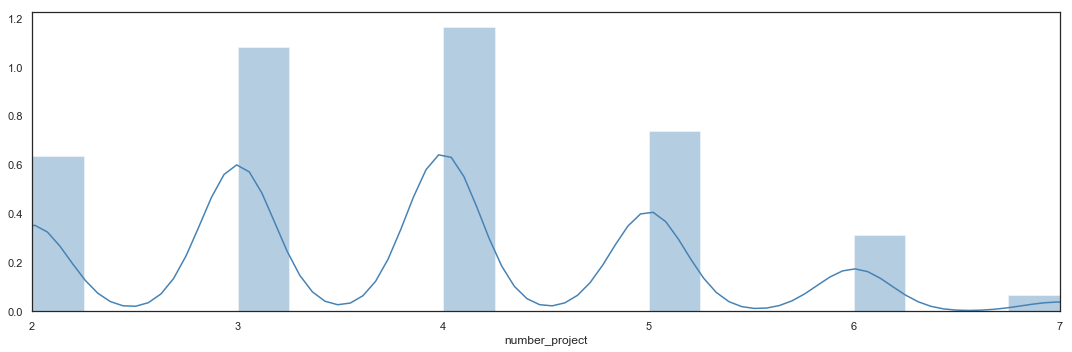

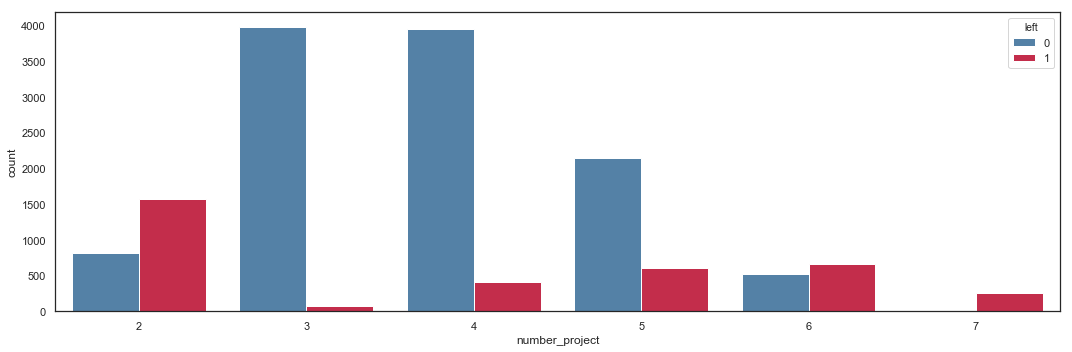

In [46]:
plt.figure(figsize=(15,5))
sns.distplot(main_df_final.number_project,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(main_df_final.number_project),max(main_df_final.number_project))
plt.tight_layout()

plt.figure(figsize=(15,5))
sns.countplot(main_df_final['number_project'],
              hue = main_df_final['left'],
              palette = ('steelblue', 'crimson'))
plt.tight_layout()

- Employees with only 2 or more than 5 projects have higher chnaces of leaving the company.

<b>Turnover by Average Monthly Hours

<Figure size 1080x360 with 0 Axes>

(96, 310)

<Figure size 1080x360 with 0 Axes>

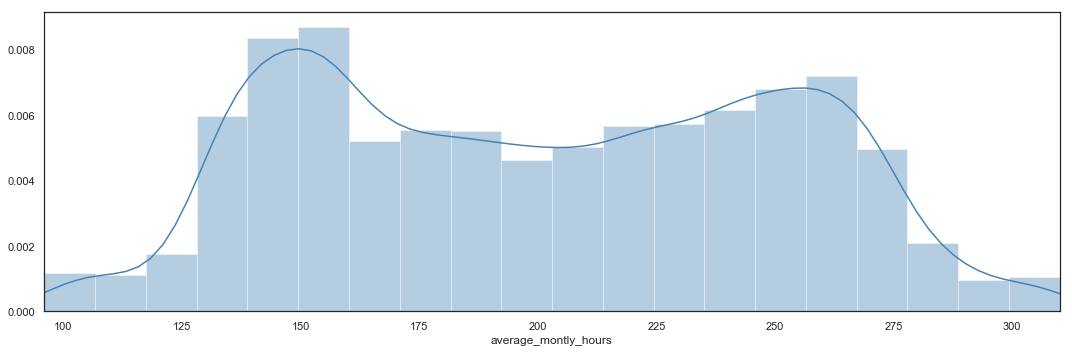

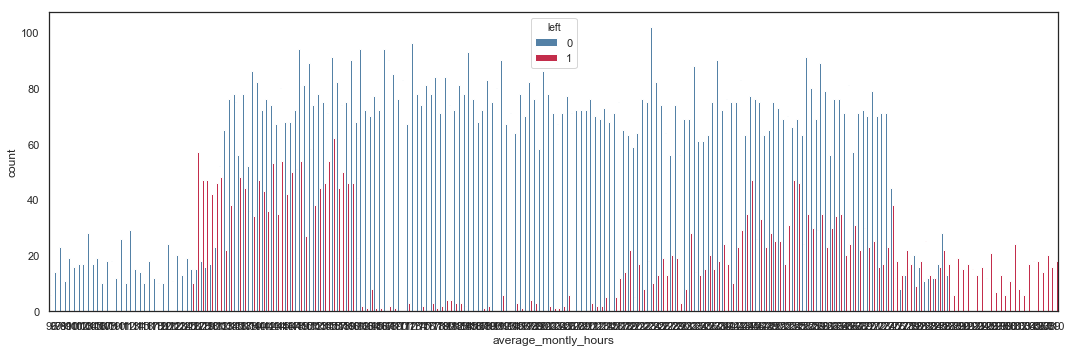

In [47]:
plt.figure(figsize=(15,5))
sns.distplot(main_df_final.average_montly_hours,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(main_df_final.average_montly_hours),max(main_df_final.average_montly_hours))
plt.tight_layout()


plt.figure(figsize=(15,5))
sns.countplot(main_df_final['average_montly_hours'],
              hue = main_df_final['left'],
              palette = ('steelblue', 'crimson'))
plt.tight_layout()

<b>The Average Monthly Hours shows 5 interesting areas: </b>

- Turnover rate is 0% below 125 hours.
- Turnover rate is high between 126 and 161 hours.
- Turnover rate is moderate between 217 and 274 hours.
- Turnover rate is roughly around 50% between 275 and 287 hours.
- Turnover rate is 100% above 288 hours.
- Employees with really low numbers of hours per month (below 125) tend to stay in the company, whereas employees working too many hours (above 275 hours) have a high probability to leave the company. A ‘safe’ range is between 161 and 217 hours, which seems to be ideal to keep employees in the company.

<b>The Last Evaluation: <b>

<Figure size 1080x360 with 0 Axes>

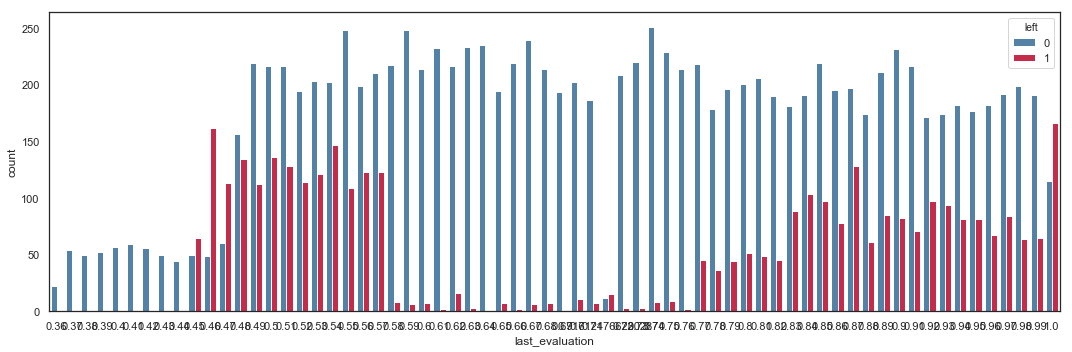

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(main_df_final['last_evaluation'],
              hue = main_df_final['left'],
              palette = ('steelblue', 'crimson'))
plt.tight_layout()

The Last Evaluation shows 2 interesting areas:

- Turnover rate is higher between 0.45 and 0.57.
- Turnover rate is higher above 0.77.
Employees with low evaluation scores tend to leave the company. A large number of good employees leave the company, maybe to get a better opportunity. Interestingly, the ones with very low scores seem to stay.